First few rows of the dataset:
  REF_DATE     GEO           DGUID  \
0  2017-01  Canada  2016A000011124   
1  2017-01  Canada  2016A000011124   
2  2017-01  Canada  2016A000011124   
3  2017-01  Canada  2016A000011124   
4  2017-01  Canada  2016A000011124   

  North American Industry Classification System (NAICS)  Seasonally Adjusted  \
0                               Retail trade [44-45]                50417235   
1                               Retail trade [44-45]                50417235   
2                               Retail trade [44-45]                 1236885   
3                               Retail trade [44-45]                 1236885   
4              Motor vehicle and parts dealers [441]                13561527   

   Unadjusted  Log_Seasonally_Adjusted  Imputed_Seasonally_Adjusted  \
0    41377009                17.735844                   50417235.0   
1     1110045                17.735844                   50417235.0   
2    41377009                14.028107        

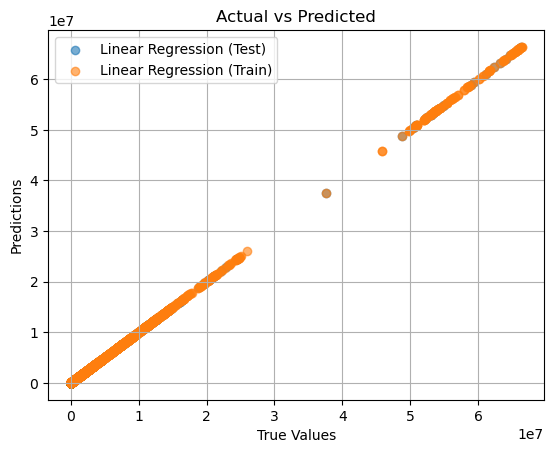

Linear Regression Metrics:
Training Mean Absolute Error (MAE): 8.898195232831732e-09
Training Mean Squared Error (MSE): 3.1411648455600054e-16
Training R-squared (R2): 1.0
Testing Mean Absolute Error (MAE): 9.337674829368599e-09
Testing Mean Squared Error (MSE): 3.621776612640437e-16
Testing R-squared (R2): 1.0




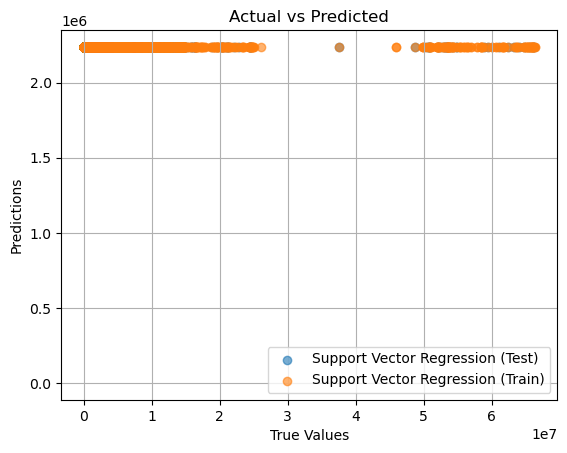

Support Vector Regression Metrics:
Training Mean Absolute Error (MAE): 5492452.878009467
Training Mean Squared Error (MSE): 154607535826228.7
Training R-squared (R2): -0.13287765191752698
Testing Mean Absolute Error (MAE): 5096511.037639711
Testing Mean Squared Error (MSE): 132622960300536.5
Testing R-squared (R2): -0.12329127713250831




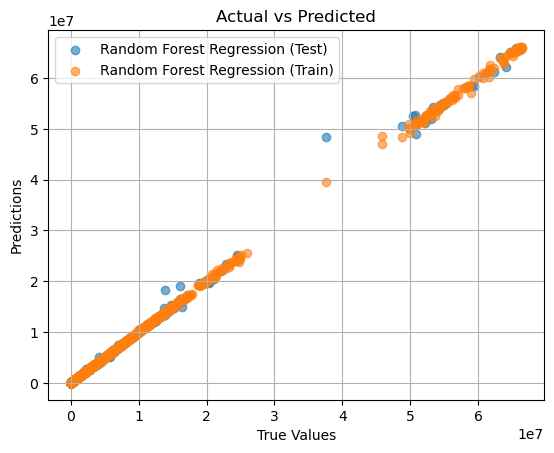

Random Forest Regression Metrics:
Training Mean Absolute Error (MAE): 33046.48666239182
Training Mean Squared Error (MSE): 13249068616.851843
Training R-squared (R2): 0.9999029182266922
Testing Mean Absolute Error (MAE): 98390.0336410253
Testing Mean Squared Error (MSE): 240524991185.51202
Testing R-squared (R2): 0.9979627990212343




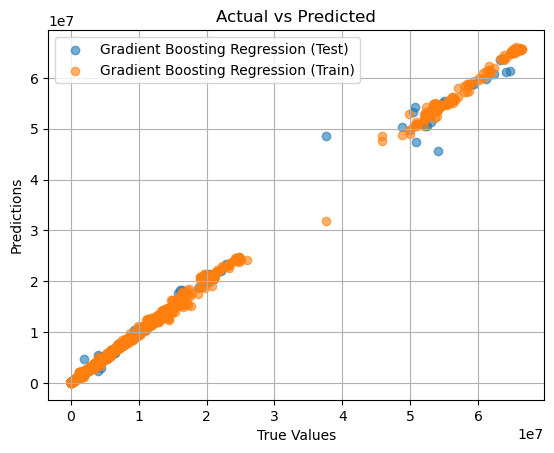

Gradient Boosting Regression Metrics:
Training Mean Absolute Error (MAE): 151836.50012902694
Training Mean Squared Error (MSE): 92885271326.83913
Training R-squared (R2): 0.9993193886215433
Testing Mean Absolute Error (MAE): 202668.93573847596
Testing Mean Squared Error (MSE): 419743847289.88574
Testing R-squared (R2): 0.9964448493592488


Best model saved with the following mean absolute error (MAE) on testing set: 9.337674829368599e-09


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# Load the dataset
data = pd.read_excel('modified_data_with_imputation_and_log_edited.xlsx')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Check the data types of columns
print("\nData types of columns:")
print(data.dtypes)

# Drop unnecessary columns
data.drop(columns=['DGUID', 'REF_DATE','Log_Seasonally_Adjusted'], inplace=True)

# Define the columns to be scaled
columns_to_scale = ['Unadjusted',
                    'Adjusted_Unadjusted_Difference',
                    'Adjusted_Unadjusted_Ratio']

# Initialize the scaler
scaler = StandardScaler()

# Scale the selected columns
scaled_data = data.copy()
scaled_data[columns_to_scale] = scaler.fit_transform(scaled_data[columns_to_scale])

# Display the first few rows of the scaled dataset
print("\nFirst few rows of the scaled dataset:")
print(scaled_data.head())

# Perform one-hot encoding on categorical columns
scaled_encoded_data = pd.get_dummies(scaled_data, columns=['GEO', 'North American Industry Classification System (NAICS)'])

# Separate features and target variable
X_scaled_encoded = scaled_encoded_data.drop(columns=['Imputed_Seasonally_Adjusted','Seasonally Adjusted'])
y_scaled_encoded = scaled_encoded_data['Imputed_Seasonally_Adjusted']

# Split the data into training and testing sets
X_train_scaled_encoded, X_test_scaled_encoded, y_train_scaled_encoded, y_test_scaled_encoded = train_test_split(X_scaled_encoded, y_scaled_encoded, test_size=0.2, random_state=42)

# Initialize different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "Random Forest Regression": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regression": GradientBoostingRegressor()
}

# Train each model individually, plot actual vs predicted graphs, and save the best model
best_model = None
best_mae = float('inf')

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled_encoded, y_train_scaled_encoded)
    
    # Make predictions
    y_train_pred = model.predict(X_train_scaled_encoded)
    y_test_pred = model.predict(X_test_scaled_encoded)
    
    # Generate actual vs predicted graph
    plt.scatter(y_test_scaled_encoded, y_test_pred, label=f'{name} (Test)', alpha=0.6)
    plt.scatter(y_train_scaled_encoded, y_train_pred, label=f'{name} (Train)', alpha=0.6)
    plt.xlabel("True Values")
    plt.ylabel("Predictions")
    plt.title("Actual vs Predicted")
    plt.legend()
    plt.plot([-3, 3], [-3, 3], linestyle='--', color='black')
    plt.grid(True)
    plt.show()
    
    # Calculate evaluation metrics
    mae_train = mean_absolute_error(y_train_scaled_encoded, y_train_pred)
    mse_train = mean_squared_error(y_train_scaled_encoded, y_train_pred)
    r2_train = r2_score(y_train_scaled_encoded, y_train_pred)
    
    mae_test = mean_absolute_error(y_test_scaled_encoded, y_test_pred)
    mse_test = mean_squared_error(y_test_scaled_encoded, y_test_pred)
    r2_test = r2_score(y_test_scaled_encoded, y_test_pred)
    
    # Print evaluation metrics
    print(f"{name} Metrics:")
    print("Training Mean Absolute Error (MAE):", mae_train)
    print("Training Mean Squared Error (MSE):", mse_train)
    print("Training R-squared (R2):", r2_train)
    print("Testing Mean Absolute Error (MAE):", mae_test)
    print("Testing Mean Squared Error (MSE):", mse_test)
    print("Testing R-squared (R2):", r2_test)
    print("\n")
    
    # Save the best model based on MAE
    if mae_test < best_mae:
        best_mae = mae_test
        best_model = model
        joblib.dump(best_model, f'best_model_{name}.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Print best model information
print("Best model saved with the following mean absolute error (MAE) on testing set:", best_mae)
